In [13]:
import pandas as pd
import os

csv_path = os.getenv("HOME") + "/aiffel/olympic/athlete_events.csv"

data=pd.read_csv(csv_path)
fd=pd.read_csv(csv_path)


In [2]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [28]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력


# 연도별 남자축구 메달 기록 모으기
football_men_medalists = football_medalists[~football_medalists['Event'].str.contains("Women's")].copy()

# Team 값 수정: 초반의 일부 팀 이름을 국가명으로 대체
team_replacements = {
    'USFSA': 'France',
    'Galt Football Club': "Canada",
    'Univ. of Brussels': 'Belgium',
    'Upton Park FC': 'United Kingdom',
    'Christian Brothers\' College-1': 'United States',
    'St. Rose-2': 'United States',
    'Smyrna': 'Greece',
    'Thessalonki-1': 'Greece'
}

# 복사본에서 컬럼 수정할떄 warning 안띄우기 위해 replace 활용
football_men_medalists['Team'] = football_men_medalists['Team'].replace(team_replacements)

# 연도별 남자축구 팀별 메달 기록 리스트
football_men_medal_teams = football_men_medalists.groupby(['Year', 'Team', 'Medal']).size().reset_index(name='Count')

# Team 칼럼을 Country로 변경하고 'Count' 칼럼 제거
football_men_medal_teams = football_men_medal_teams.rename(columns={'Team': 'Country'}).drop(columns=['Count'])

# 데이터 출력
print(football_men_medal_teams)





    Year         Country   Medal
0   1900         Belgium  Bronze
1   1900          France  Silver
2   1900  United Kingdom    Gold
3   1904          Canada    Gold
4   1904   United States  Bronze
5   1904   United States  Silver
6   1906         Denmark    Gold
7   1906          Greece  Bronze
8   1906          Greece  Silver
9   1908         Denmark  Silver
10  1908   Great Britain    Gold
11  1908     Netherlands  Bronze
12  1912         Denmark  Silver
13  1912   Great Britain    Gold
14  1912     Netherlands  Bronze
15  1920         Belgium    Gold
16  1920     Netherlands  Bronze
17  1920           Spain  Silver
18  1924          Sweden  Bronze
19  1924     Switzerland  Silver
20  1924         Uruguay    Gold
21  1928       Argentina  Silver
22  1928           Italy  Bronze
23  1928         Uruguay    Gold
24  1936         Austria  Silver
25  1936           Italy    Gold
26  1936          Norway  Bronze
27  1948         Denmark  Bronze
28  1948          Sweden    Gold
29  1948  

In [18]:
# 남자 축구 데이터를 그룹화하여 고유한 연도를 계산
unique_years = football_men_medal_teams['Year'].nunique()

# 올림픽에서 남자 축구 총 몇회 열렸는지 확인
print(f"올림픽에서 남자 축구는 총 {unique_years}회 열렸습니다.")

올림픽에서 남자 축구는 총 27회 열렸습니다.


In [29]:
# 메달 점수 지표를 만들기 위해 점수 매핑
medal_points = {'Gold': 4, 'Silver': 2, 'Bronze': 1}

# 메달 점수를 계산하여 새로운 칼럼을 추가
football_men_medal_teams['Medal Points'] = football_men_medal_teams['Medal'].map(medal_points)

# 연도별로 팀들의 메달 점수를 집계
team_medal_scores = football_men_medal_teams.groupby(['Country', 'Year'])['Medal Points'].sum().reset_index()

# 1. 역대 가장 메달 점수가 높은 10팀
top_10_all_time = team_medal_scores.groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 2. 첫 10개 대회에서 가장 메달 점수가 높은 10팀
first_10_years = sorted(football_men_medal_teams['Year'].unique())[:10]
top_10_first_10_games = team_medal_scores[team_medal_scores['Year'].isin(first_10_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 3. 그 다음 10개 대회에서 가장 메달 점수가 높은 10팀
next_10_years = sorted(football_men_medal_teams['Year'].unique())[10:20]
top_10_next_10_games = team_medal_scores[team_medal_scores['Year'].isin(next_10_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(10)

# 4. 마지막 7개 대회에서 가장 메달 점수가 높은 7팀
last_7_years = sorted(football_men_medal_teams['Year'].unique())[-7:]
top_7_last_7_games = team_medal_scores[team_medal_scores['Year'].isin(last_7_years)].groupby('Country')['Medal Points'].sum().sort_values(ascending=False).head(7)

# 결과 출력
results = pd.DataFrame({
    'Category': ['Top 10 All Time', 'Top 10 First 10 Games', 'Top 10 Next 10 Games', 'Top 7 Last 7 Games'],
    'Teams': [top_10_all_time.index.tolist(), top_10_first_10_games.index.tolist(), top_10_next_10_games.index.tolist(), top_7_last_7_games.index.tolist()],
    'Points': [top_10_all_time.values.tolist(), top_10_first_10_games.values.tolist(), top_10_next_10_games.values.tolist(), top_7_last_7_games.values.tolist()]
})

# 표 출력
print(results)


                Category                                              Teams  \
0        Top 10 All Time  [Hungary, Argentina, Brazil, Denmark, Soviet U...   
1  Top 10 First 10 Games  [Denmark, Uruguay, Great Britain, Sweden, Belg...   
2   Top 10 Next 10 Games  [Hungary, Soviet Union, Yugoslavia, East Germa...   
3     Top 7 Last 7 Games  [Argentina, Brazil, Nigeria, Spain, Cameroon, ...   

                                 Points  
0  [15, 12, 12, 11, 11, 11, 8, 8, 8, 8]  
1        [9, 8, 8, 5, 5, 5, 4, 4, 3, 3]  
2      [15, 11, 9, 7, 6, 6, 4, 4, 3, 2]  
3                [10, 8, 7, 6, 4, 4, 2]  


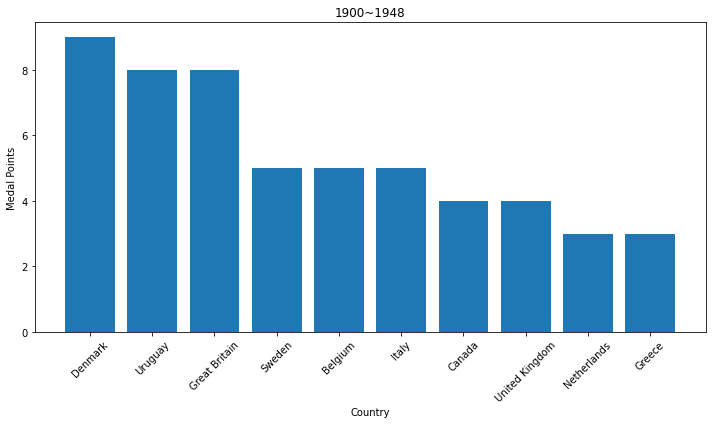

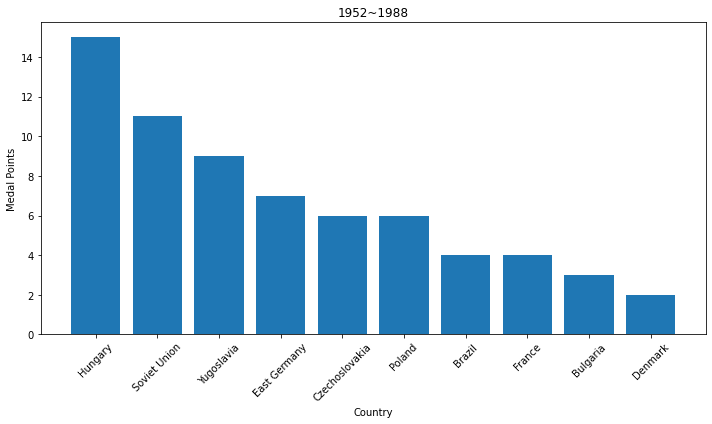

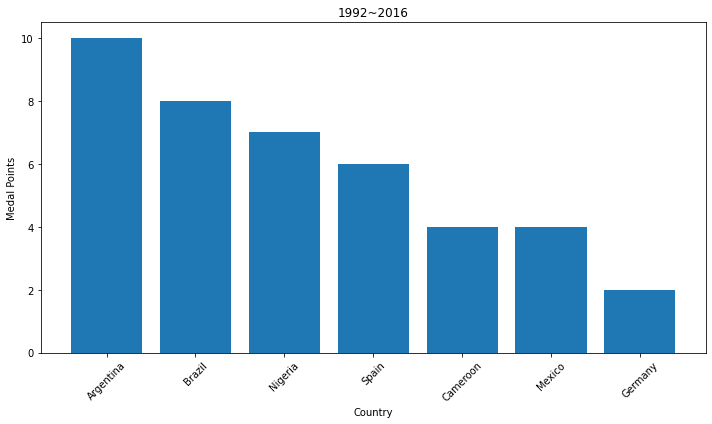

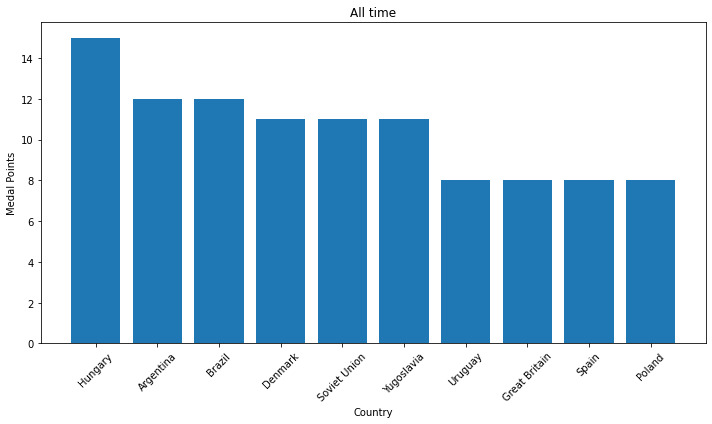

In [32]:
import matplotlib.pyplot as plt

# 범주 이름 설정
categories = {
    'Top 10 First 10 Games': '1900~1948',
    'Top 10 Next 10 Games': '1952~1988',
    'Top 7 Last 7 Games': '1992~2016',
    'Top 10 All Time': 'All time'
}

# 데이터 준비
data = {
    '1900~1948': (top_10_first_10_games.index.tolist(), top_10_first_10_games.values.tolist()),
    '1952~1988': (top_10_next_10_games.index.tolist(), top_10_next_10_games.values.tolist()),
    '1992~2016': (top_7_last_7_games.index.tolist(), top_7_last_7_games.values.tolist()),
    'All time': (top_10_all_time.index.tolist(), top_10_all_time.values.tolist()),
}

# 그래프 생성
for category, (countries, points) in data.items():
    plt.figure(figsize=(10, 6))
    plt.bar(countries, points)
    plt.xlabel('Country')
    plt.ylabel('Medal Points')
    plt.title(category)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
